In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

In [3]:
df = pd.read_csv('Final_dataset.csv')

In [4]:
df.dropna(inplace=True)

In [5]:
if 'Customer ID' in df.columns:
    df.rename(columns={'Customer ID':'Customer_ID'},inplace=True) 

In [6]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [7]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer_ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-01-12 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-01-12 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-01-12 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-01-12 07:45:00,1.25,13085.0,United Kingdom


In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate'] = df['InvoiceDate'].dt.date

In [9]:
df.dtypes

Invoice         object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
Price          float64
Customer_ID    float64
Country         object
dtype: object

In [10]:
sales = df.groupby('InvoiceDate')['Price'].sum()

In [11]:
daily_sales_data = pd.DataFrame(sales)

In [12]:
daily_sales_data.reset_index()

,InvoiceDate,Price
0,2009-01-12,7541.01
1,2009-02-12,6982.95
2,2009-03-12,9214.00
3,2009-04-12,5573.63
4,2009-05-12,1443.26
...,...,...
599,2011-12-06,3033.94
600,2011-12-07,2228.50
601,2011-12-08,2078.51
602,2011-12-09,4277.26


In [13]:
daily_sales_data.index = pd.to_datetime(daily_sales_data.index)

In [14]:
daily_sales_data.head()

,Price
InvoiceDate,
2009-01-12,7541.01
2009-02-12,6982.95
2009-03-12,9214.00
2009-04-12,5573.63
2009-05-12,1443.26


<Axes: xlabel='InvoiceDate'>

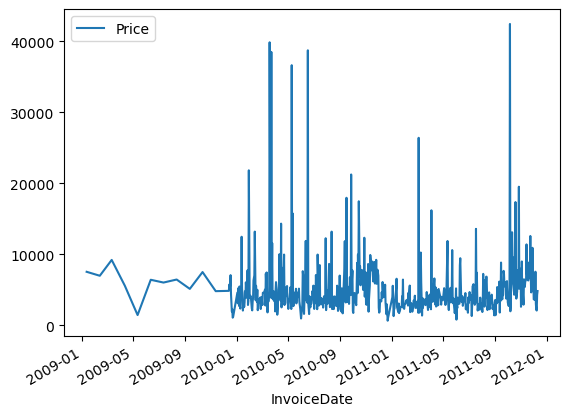

In [15]:
daily_sales_data.plot()

In [16]:
import numpy as np
from scipy import stats

def remove_outliers(df, column):
    # Calculate the Z-score for the specified column
    z_scores = np.abs(stats.zscore(df[column]))

    # Define a threshold value to identify outliers
    threshold = 3

    # Find the indices of outliers based on the threshold
    outlier_indices = np.where(z_scores > threshold)

    # Remove the outliers from the dataframe
    cleaned_df = df.drop(outlier_indices[0])

    return cleaned_df
cleaned_df = remove_outliers(daily_sales_data.reset_index(),'Price')

In [17]:
cleaned_df.set_index('InvoiceDate',inplace=True)

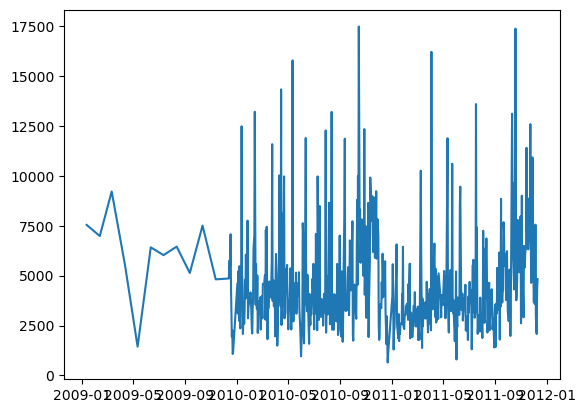

In [18]:
plt.plot(cleaned_df)

In [19]:
# import pandas as pd


def check_stationarity(df, column):
    # Perform Augmented Dickey-Fuller test
    result = adfuller(df[column])

    # Extract test statistics and p-value
    test_statistic = result[0]
    p_value = result[1]

    # Set significance level
    significance_level = 0.05

    # Print the test statistics and p-value
    print("Augmented Dickey-Fuller Test Results:")
    print("------------------------------------")
    print(f"Test Statistic: {test_statistic}")
    print(f"P-value: {p_value}")
    print("------------------------------------")

    # Compare p-value with significance level
    if p_value < significance_level:
        print("Result: Series is stationary.")
    else:
        print("Result: Series is non-stationary.")




In [20]:
check_stationarity(cleaned_df, 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -6.754515616919636
P-value: 2.894478657463648e-09
------------------------------------
Result: Series is stationary.


<Axes: xlabel='InvoiceDate'>

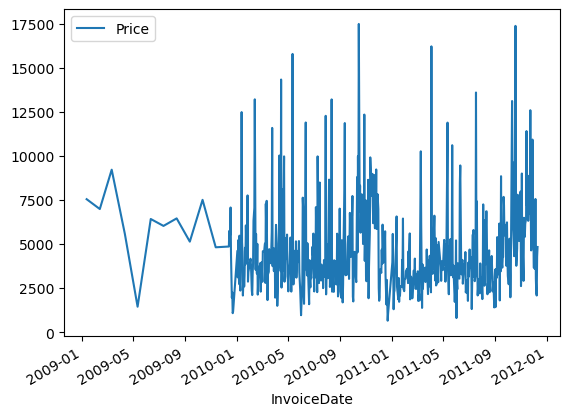

In [21]:
cleaned_df.plot()

In [129]:
X_train = cleaned_df.index.astype('int64').values.reshape(-1, 1)[:300]
y_train = cleaned_df['Price'][:300]
X_test =  cleaned_df.index.astype('int64').values.reshape(-1, 1)[300:]
y_test =  cleaned_df['Price'][300:]

In [130]:
from sklearn.linear_model import LinearRegression

In [131]:
regression_model = LinearRegression()

In [132]:
regression_model.fit(X_train,y_train)

LinearRegression()

In [133]:
regression_model.score(X_test,y_test)

-0.12668083803487873

In [134]:
predicted = pd.DataFrame()

In [135]:
predicted.index = np.arange(0,len(X_test))
predicted['Dates'] = cleaned_df.index[300:]
predicted['Actual'] = np.array(y_test)
predicted['predict'] = np.array(regression_model.predict(X_test))

In [136]:
predicted.head()

,Dates,Actual,predict
0,2011-01-12,6562.64,5086.591770
1,2011-01-13,2583.32,5088.475753
2,2011-01-14,2338.40,5090.359735
3,2011-01-16,1854.50,5094.127701
4,2011-01-17,3071.96,5096.011684


In [137]:
predicted.set_index('Dates',inplace=True)

In [138]:
import seaborn as sns

<Axes: xlabel='Dates', ylabel='Actual'>

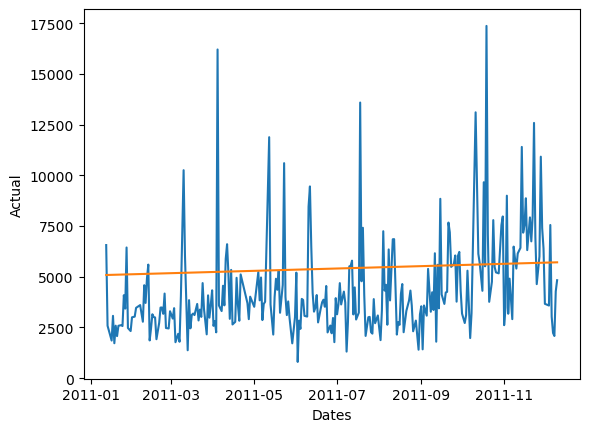

In [139]:
sns.lineplot(predicted['Actual'])
sns.lineplot(predicted['predict'])



In [140]:
#import mse
from sklearn.metrics import mean_squared_error

In [141]:
mean_squared_error(y_test,regression_model.predict(X_test))

6508137.47192529

## Trying Timeseries models

C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\3566459360.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2009'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\3566459360.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2010'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\3566459360.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2011'])


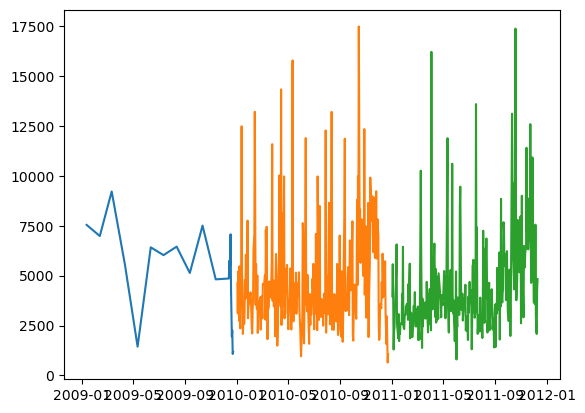

In [45]:
plt.plot(cleaned_df['2009'])
plt.plot(cleaned_df['2010'])
plt.plot(cleaned_df['2011'])

C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\1142153122.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['05/2010'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\1142153122.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['06/2010'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\1142153122.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['07/2010'])


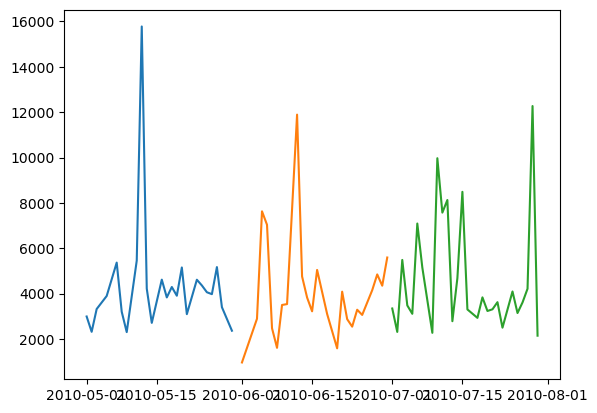

In [51]:
plt.plot(cleaned_df['05/2010'])
plt.plot(cleaned_df['06/2010'])
plt.plot(cleaned_df['07/2010'])

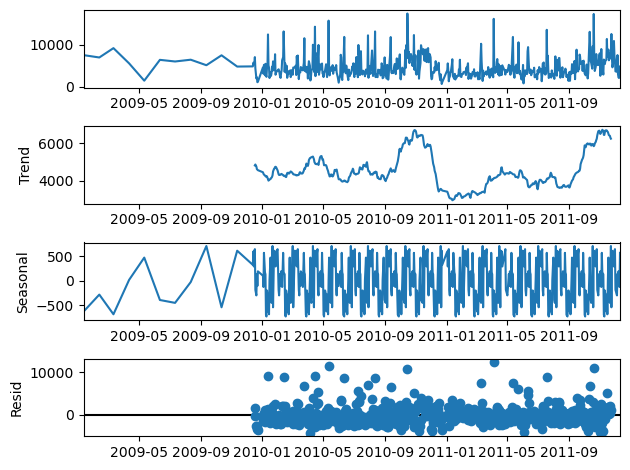

In [53]:
from statsmodels.tsa.seasonal import seasonal_decompose 
result = seasonal_decompose(cleaned_df, model='additive', period=30)
result.plot() 
plt.show()

In [71]:
np.unique(cleaned_df.index.year)

array([2009, 2010, 2011], dtype=int64)

C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\999220571.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2009'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\999220571.py:2: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2010'])
C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\999220571.py:3: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  plt.plot(cleaned_df['2011'])


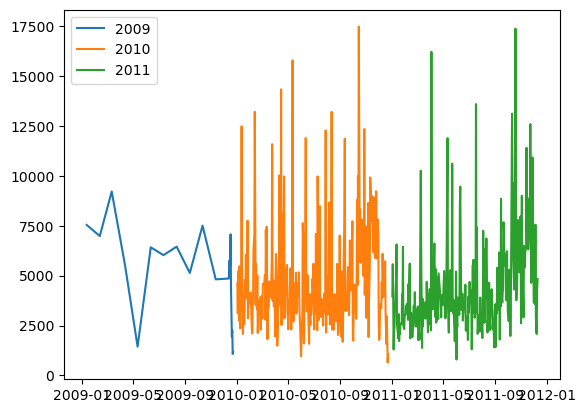

In [74]:
plt.plot(cleaned_df['2009'])
plt.plot(cleaned_df['2010'])
plt.plot(cleaned_df['2011'])
plt.legend(np.unique(cleaned_df.index.year))
plt.show()


In [75]:
check_stationarity(cleaned_df['2009'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: 0.3818237298975303
P-value: 0.9808023414054641
------------------------------------
Result: Series is non-stationary.


C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\3071325261.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2009'], 'Price')


In [76]:
check_stationarity(cleaned_df['2010'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -9.381325697890446
P-value: 6.944578719521801e-16
------------------------------------
Result: Series is stationary.


C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\3275466782.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2010'], 'Price')


In [77]:
check_stationarity(cleaned_df['2011'], 'Price')

Augmented Dickey-Fuller Test Results:
------------------------------------
Test Statistic: -4.036490404270844
P-value: 0.0012310395098654601
------------------------------------
Result: Series is stationary.


C:\Users\pravi\AppData\Local\Temp\ipykernel_38528\4261076915.py:1: FutureWarning: Indexing a DataFrame with a datetimelike index using a single string to slice the rows, like `frame[string]`, is deprecated and will be removed in a future version. Use `frame.loc[string]` instead.
  check_stationarity(cleaned_df['2011'], 'Price')


### since 2009 data is not proper and different from other data, it is decided to remove that data

In [79]:
cleaned_df = cleaned_df[cleaned_df.index.year!=2009]

so we do the seasonal decompose again without 2009

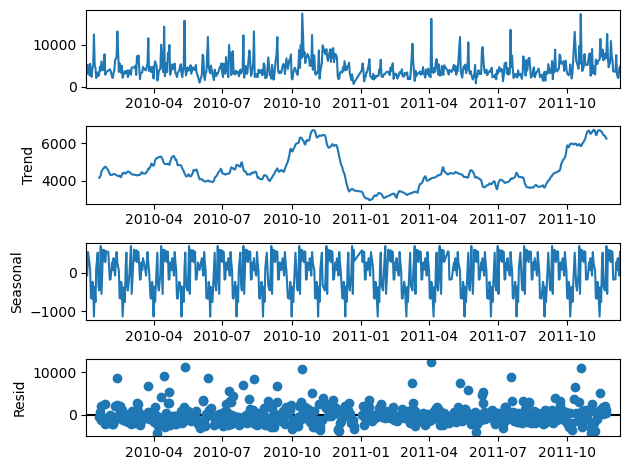

In [84]:
result = seasonal_decompose(cleaned_df, model='additive', period=30)
result.plot() 
plt.show()

now we can strong monthly seasonality but the data is stationary, so no differencing needed

# Rolling Mean

In [89]:
dfrollingmean = cleaned_df.rolling(window=7).mean()

<Figure size 2000x2000 with 0 Axes>

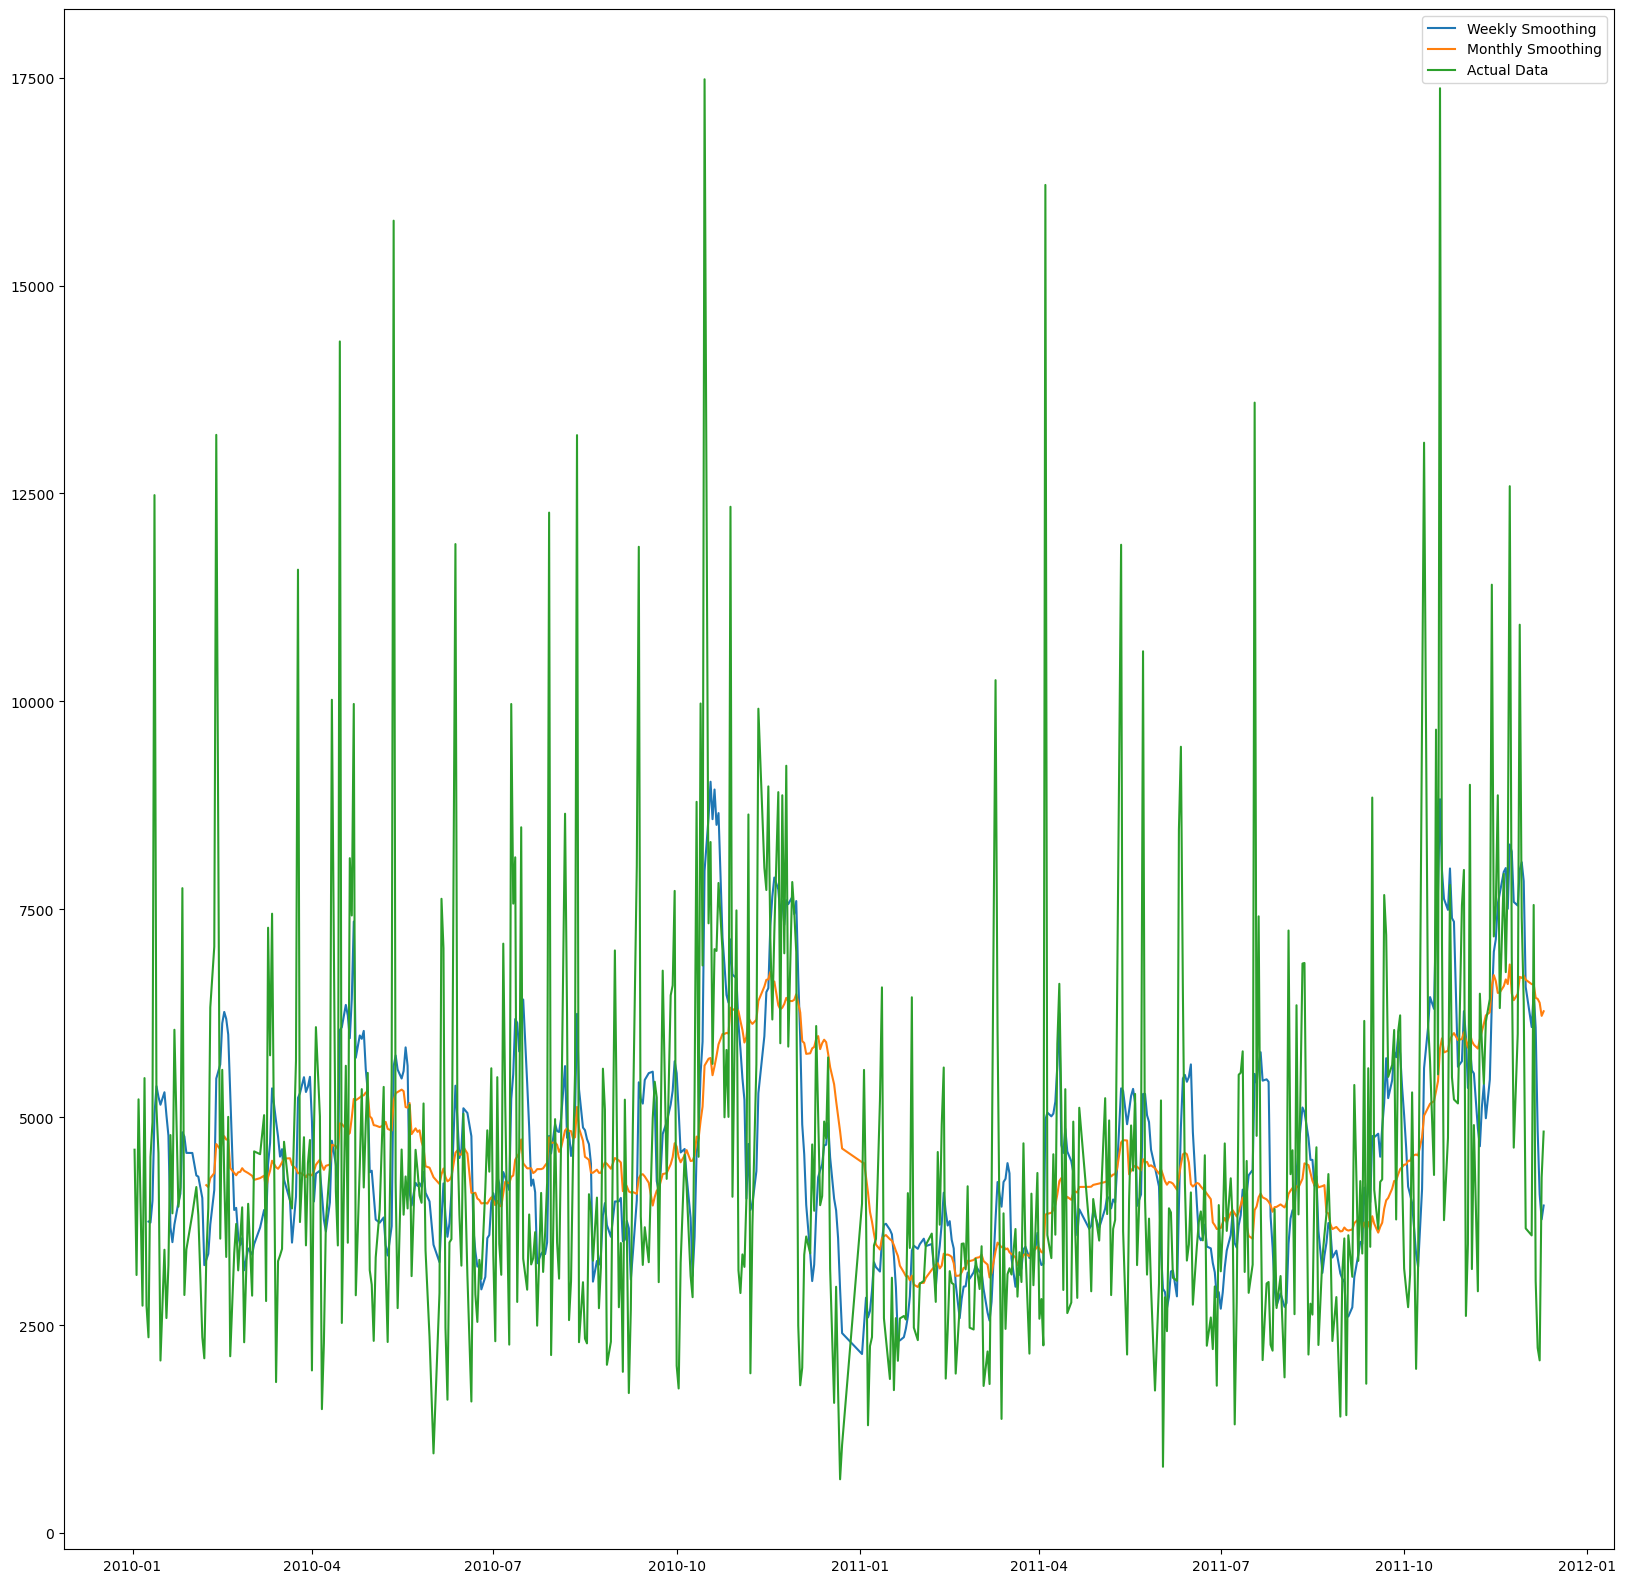

In [101]:
plt.figure(figsize=(20,20))
plt.figure(figsize=(20,20))
plt.plot(cleaned_df.rolling(window=7).mean(), label='Weekly Smoothing')
plt.plot(cleaned_df.rolling(window=30).mean(), label='Monthly Smoothing')
plt.plot(cleaned_df, label='Actual Data')
plt.legend()
plt.show()

In [117]:
from sklearn.metrics import mean_squared_error

# Calculate metrics
mse_weekly = mean_squared_error(cleaned_df.iloc[6:], rolled_weekly.dropna(), squared=True)
mse_monthly = mean_squared_error(cleaned_df[29:], rolled_monthly.dropna(), squared=True)

# Print metrics
print("MSE (Weekly Smoothing):", mse_weekly)
print("MSE (Monthly Smoothing):", mse_monthly)

MSE (Weekly Smoothing): 4455380.063041111
MSE (Monthly Smoothing): 5369107.74576271


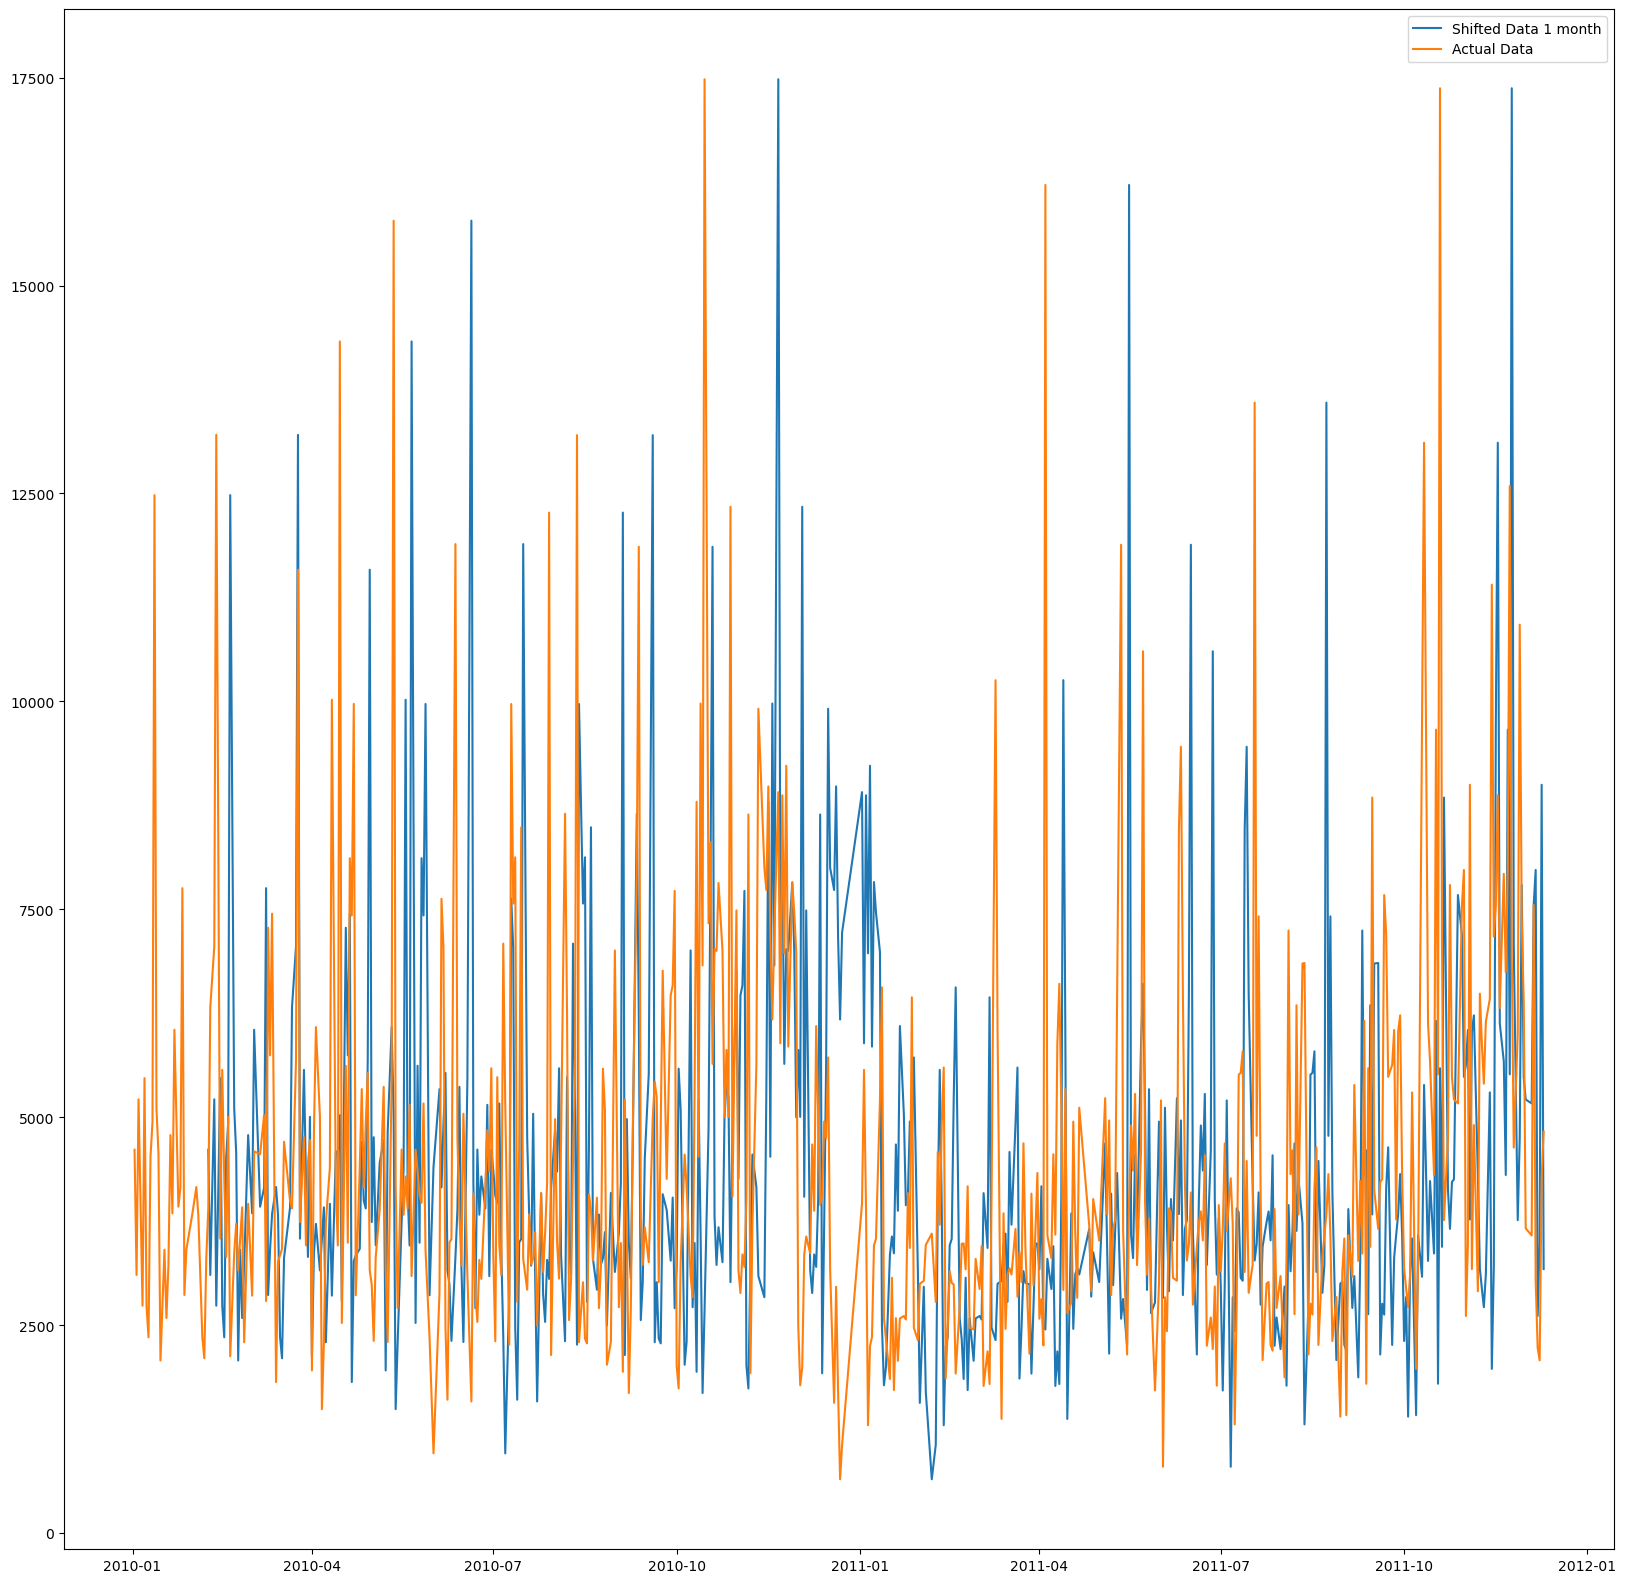

In [104]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.plot(cleaned_df.shift(30), label='Shifted Data 1 month')
plt.plot(cleaned_df, label='Actual Data')
plt.legend()
plt.show()

In [128]:
shifted_data = cleaned_df.shift(30)
# Calculate metrics
mse_shifted = mean_squared_error(cleaned_df[30:], shifted_data.dropna(), squared=True)

# Print metrics
print("MSE (Shifted Data 1 month):", mse_shifted)

MSE (Shifted Data 1 month): 11634850.703235338


In [78]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

[]

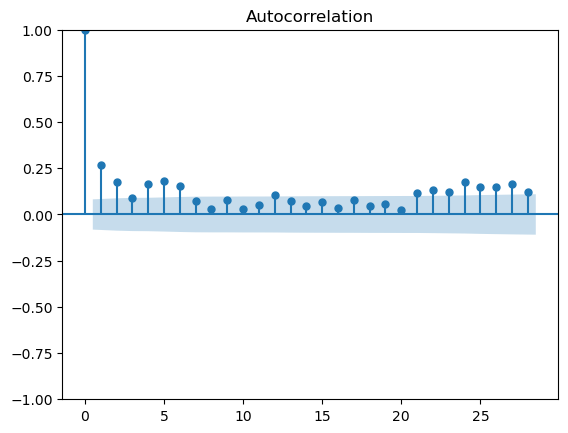

In [80]:
plot_acf(cleaned_df)
plt.plot()

## from above acf plot we can infer that d value is 3

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


[]

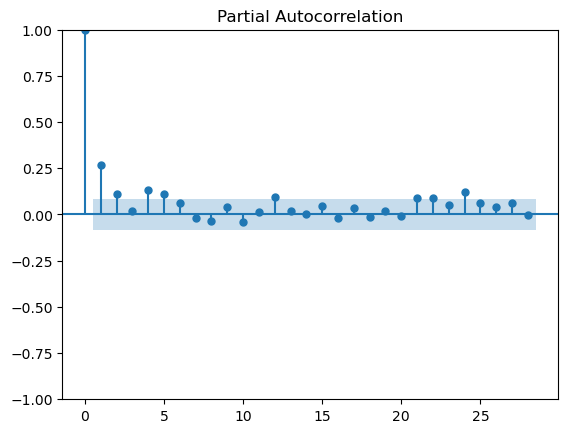

In [81]:
plot_pacf(cleaned_df)
plt.plot()

## from above pacf plot we can infer p value is 2

In [165]:
train = cleaned_df['Price'][:300]
test = cleaned_df['Price'][300:]

In [166]:
len(test)

273

# ARIMA

In [167]:
from statsmodels.tsa.arima.model import ARIMA

In [197]:
model = ARIMA(train, order=(2,0,3))
model_fit = model.fit()
print(model_fit.summary())
# X_train
# y_train
# X_test 
# y_test 

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                  300
Model:                 ARIMA(2, 0, 3)   Log Likelihood               -2766.382
Date:                Sun, 04 Jun 2023   AIC                           5546.765
Time:                        12:11:24   BIC                           5572.691
Sample:                             0   HQIC                          5557.141
                                - 300                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       4731.2461    366.885     12.896      0.000    4012.164    5450.328
ar.L1          0.3793      0.586      0.647      0.518      -0.770       1.529
ar.L2          0.4606      0.428      1.076      0.2

In [198]:
result=model_fit.forecast(273)
result.index = test.index

c:\Users\pravi\anaconda3\envs\gputest\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


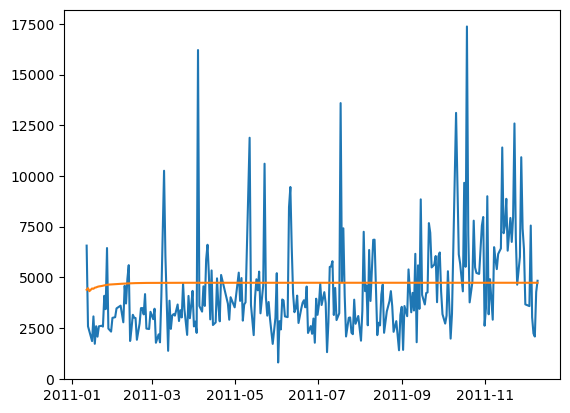

In [199]:
plt.plot(test)
plt.plot(result)
plt.show()

In [194]:
mse_arima = mean_squared_error(test, result, squared=True)
print("The mean squared error calue of arima is ",mse_arima)

The mean squared error calue of arima is  5862307.935150987


In [173]:
from pmdarima.arima import auto_arima

In [191]:
auto_model=auto_arima(train,d=0,start_q=0,start_p=0,max_p=3,max_q=3,D=1,start_P=0,start_Q=0,max_P=1,max_Q=1,seasonal=True,
                   trace=True,stepwise=True,m=1)

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=5558.722, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=5545.584, Time=0.06 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=5549.080, Time=0.06 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=6006.374, Time=0.02 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=5543.924, Time=0.10 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=5545.660, Time=0.12 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=5545.863, Time=0.14 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=5546.458, Time=0.08 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=5547.655, Time=0.25 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=5614.473, Time=0.06 sec

Best model:  ARIMA(2,0,0)(0,0,0)[0] intercept
Total fit time: 0.931 seconds


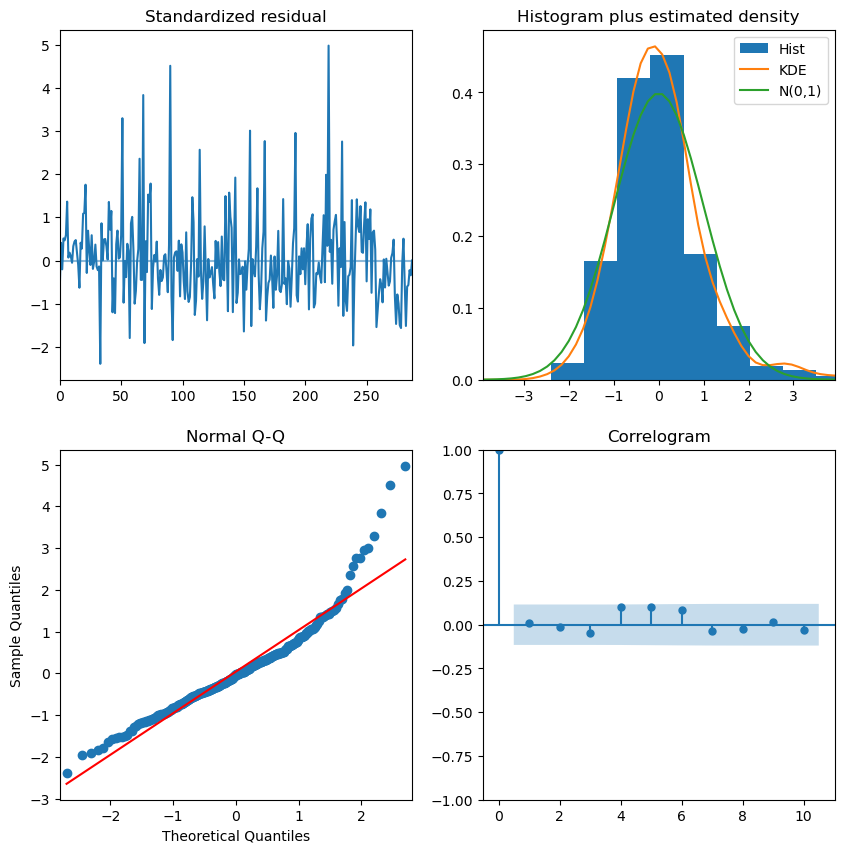

In [190]:
auto_model.plot_diagnostics(figsize=(10,10))
plt.show()